## 3-2 Structures of Deep Learning and Layer

1. 모델구조
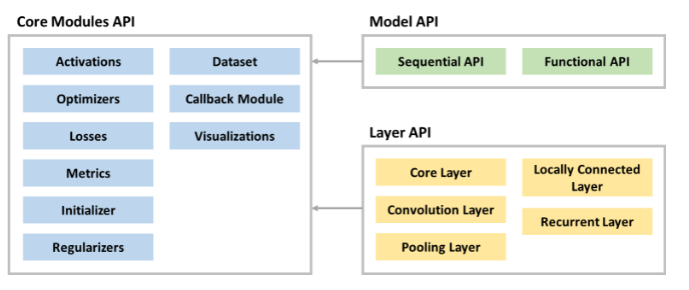 <br>

2. Layer

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

입력층(Input Layer) <br>
    - 딥러닝 모델의 입력을 정의할 때 사용 <br>
    - 입력 데이터의 모양인 shape와 예상되는 데이터 유형인 dtype등을 포함 <br>
은닉층(hidden Layer) <br>
    - <br>
출력층(Output Layer) <br>
    - <br>
Dense Layer <br>
    - 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정하면 생성 <br>
Flatten Layer <br>
    - 배치 크기 (또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환 <br>
Activation Layer <br>
    - 활성화 함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할 <br>
    - 크게 선형 활성화 함수(Linear activation function)와 비선형 활성화함수(Non-Linear Activation Function)로 구분 <br>
    - 딥러닝에서는 선형 활성화함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형활성화함수를 사용 <br>

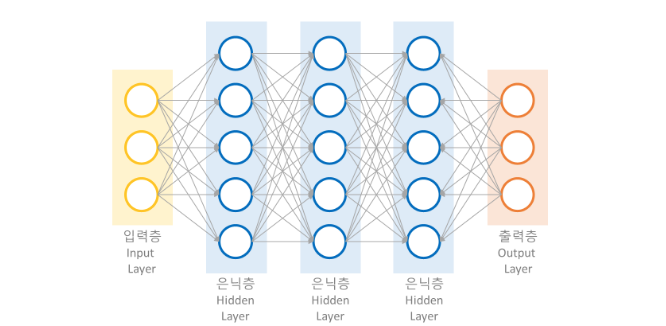

#### Input객체

In [5]:
print(keras.Input(shape=(8,), dtype=tf.int32))
print(keras.Input(shape=(28, 28), dtype=tf.float32))

# input객체는 배치크기를 batch_size로 지정할 수 있고, name을 통해서 이름을 지정할 수도 있다.
print(keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16))
print(keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input'))

KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.int32, name='input_5'), name='input_5', description="created by layer 'input_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
KerasTensor(type_spec=TensorSpec(shape=(16, 28, 28), dtype=tf.float32, name='input_7'), name='input_7', description="created by layer 'input_7'")
KerasTensor(type_spec=TensorSpec(shape=(16, 28, 28), dtype=tf.float32, name='input'), name='input', description="created by layer 'input'")


#### Dense 레이어

In [9]:
print(layers.Dense(10))

# name을 통해 지정하여 레이어간의 구분이 가능함
print(layers.Dense(10, name='layer1'))

# 레이어에서 사용할 활성화 함수(activation)을 지정하여 생성하는 것이 가능
print(layers.Dense(10, activation='softmax'))
print(layers.Dense(10, activation='relu', name='Dense Layer'))

# 랜덤으로 만든값
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.7521852  0.03895259]
 [0.8805367  0.51038444]
 [0.89469945 0.44193542]
 [0.39213383 0.1153537 ]
 [0.9846878  0.38774395]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_7/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.5912798 ,  0.23309314, -0.519601  ,  0.7044051 , -0.24280798,
        -0.4033278 , -0.4452162 ,  0.69605464, -0.46007296,  0.54802245],
       [-0.5576552 , -0.0681051 , -0.33151785, -0.16787344, -0.53133285,
         0.5995075 , -0.04515952, -0.30342713,  0.63189334,  0.65835935]],
      dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_7/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.42302984 0.17267635 0.         0.52330405 0.         0.
  0.         0.5117428  0.         0.4378592 ]
 [0.23602499 0.17048727 0.         0.53457457 0.         0.
  0.         

#### Activation 레이어

활성화 함수(Linear activation function)와 비선형 활성화 함수(Non-linear activation function)로 구분할 수 있음. 
다만 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형 활성화 함수를 사용

Matplotlib is building the font cache; this may take a moment.


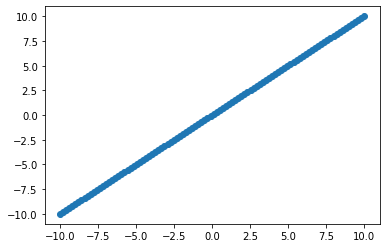

In [10]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

시그모이드 함수: σ(x)= $\frac{1}{1+e^−x}$, 
- 확률예축 모델에 자주 사용, 0과 1사이로 나타냄
- 0과 1에서 포화(saturate)되는 문제가 있음
- gradient가 0에 까까워져서 가중치 업데이트가 발생하지 않게 됨

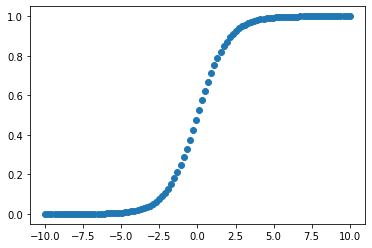

In [11]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

하이퍼볼릭 탄젠트: tanh(x)= $ \frac{e^x - e^(-x)}{e^x + e^(-x)} $
- 0을 중심으로 -1과 1사이로 값을 나타냄
- 일반적으로 시그모이드 함수보다는 빨리 훈련
- 여전히 -1과 1에서 포화되는 문제가 있음

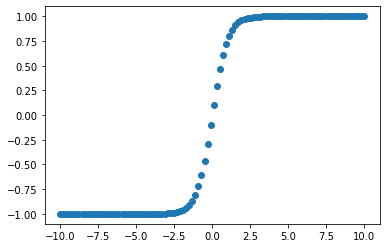

In [12]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

비선형함수 <br>
ReLU (Rectified Linear Unit) 함수: f(x) = max(0,x)
- ReLU 함수의 출력값은 0부터 무한대까지의 범위의 값을 가지므로 하이퍼볼릭 탄젠트 함수보다 몇 배는 더 빠르게 훈련된다. 
- 다만 ReLU 함수 출력값이 0이 중심이 아니고, 학습률(learning rate)이 크면 ReLU를 사용한 노드에서 출력이 0으로만 나온다는 문제가 있다.

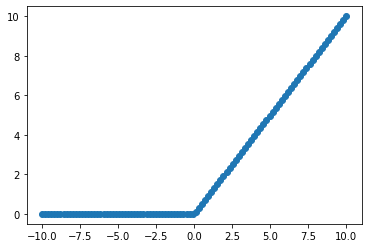

In [13]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

LeakyReLU 함수: f(x)=max(0.01x,x)
- ReLU함수에서 노드출력을 0으로만 하던 문제를 아주 작은 음수값을 출력하게 만들어 해결

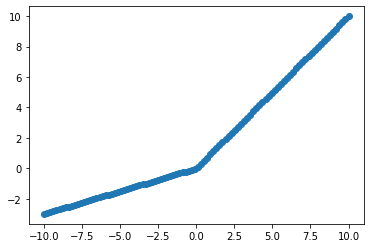

In [15]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

ELU 함수
Exponential Linear Unit함수: f(x)={ $ \ begin{Bmatrix} x & if x>0 \\ a(e^(x)-1) & if x<=0 \ end{Bmatrix} $  }
- ReLU중심점이 0이 아니고, 노드 출력을 0로만 하던 문제를 해결한 활성화 함수
  
if x>0
if x≤0



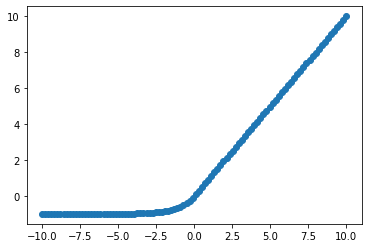

In [16]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

#### Flatten 레이어

배치크기(또는 데이터크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


In [18]:
inputs = keras.Input(shape=(224, 224, 1))
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


## 3-3 DeepLearning Model

In [20]:
from tensorflow.keras import models, utils

#### Sequential API
장) 순차적인 구조로 진행, 간단한 방법 <br>
단) 다중 입력 및 출력같은 복잡한 모델을 구성할 수 없음.

In [22]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_9 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_10 (Dense)             (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


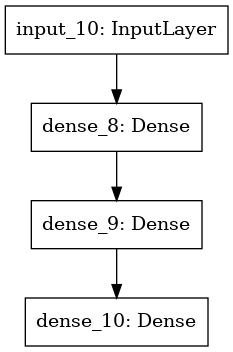

In [23]:
utils.plot_model(model)

In [24]:
# Sequential안에 한꺼번에 추가
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


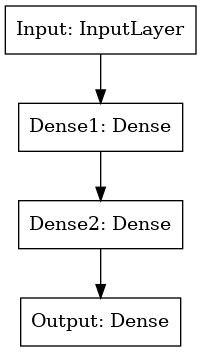

In [25]:
utils.plot_model(model)

#### Functional API
- 가장 권장되는 방법
- Functional API는 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능 
- 다중 입출력을 다룰 수 있음

In [26]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_12 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


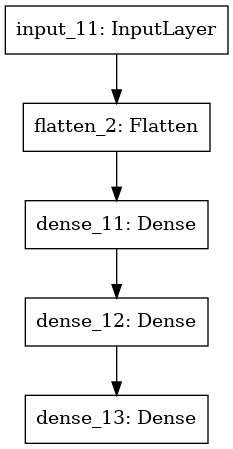

In [27]:
utils.plot_model(model)

In [28]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 28, 100)      2900        input_12[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 28, 30)       3030        dense_14[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_12[0][0]                   
                                                                 dense_15[0][0]             

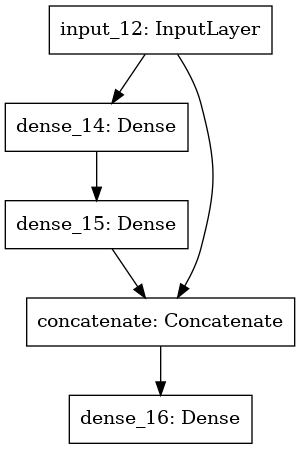

In [29]:
utils.plot_model(model)

In [30]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 100)      2900        Input_2[0][0]                    
__________________________________________________________________________________________________
Input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 10, 10)       1010        dense_17[0][0]                   
____________________________________________________________________________________________

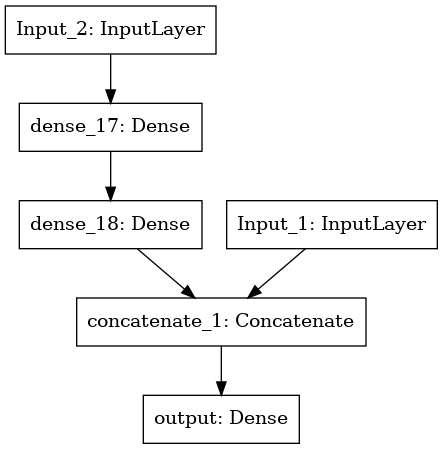

In [31]:
utils.plot_model(model)

In [32]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 10, 10)       1010        dense_19[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_20[0][0]                   
____________________________________________________________________________________________

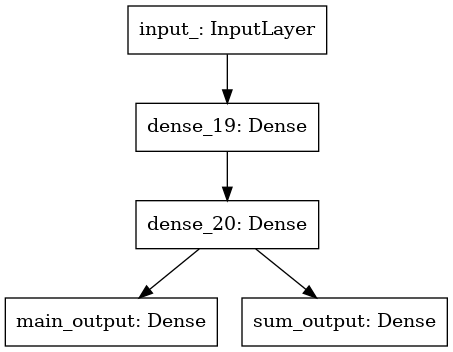

In [33]:
utils.plot_model(model)

In [34]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 10, 10)       1010        dense_21[0][0]                   
____________________________________________________________________________________________

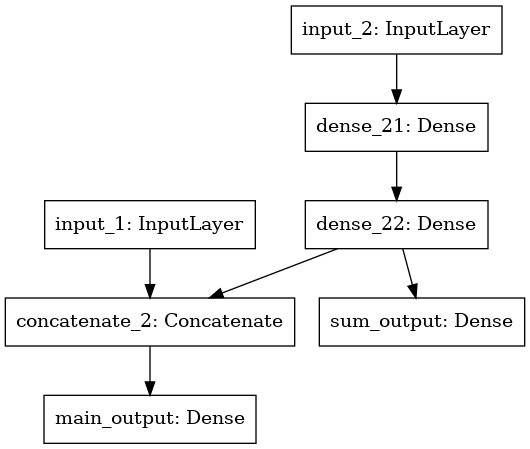

In [35]:
utils.plot_model(model)

#### Subclassing API

- 커스터마이징에 최적화된 Model클래스를 상속받아서 사용
- Functional API로도 구현할 수 없는 모델들도 구현이 가능
- 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야 함

다음과 같은 기능 사용가능
- fit(): 모델 학습
- evaluate(): 모델 평가
- predict(): 모델 예측
- save(): 모델 저장
- load(): 모델 불러오기
- call(): 메소드안에서 원하는 계산 가능

In [36]:
# Subclassing API의 예시
class MyModel(models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense_layer1 = layers.Dense(300, activation=activation)
        self.dense_layer2 = layers.Dense(100, activation=activation)
        self.dense_layer3 = layers.Dense(units, activation=activation)
        self.output_layer = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x

In [37]:
# 실습1
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape=(100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='ReLU'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation='ReLU'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='Softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_24 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_25 (Dense)             (None, 400)               80400     
Total params: 12,161,000
Trainable params: 12,161,000
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 실습2

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100, 100, 3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='ReLU')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='ReLU')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='Softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 400)               12000400  
_________________________________________________________________
dense_27 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               20100     
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class YourModel(models.Model):
    def __init__(self, **kwargs):
        super(YourModel, self).__init__(**kwargs)
        # Flatten 레이어를 쌓으세요.
        self.flat_layer = layers.Flatten()
        # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer1 = layers.Dense(400, activation='ReLU')
        # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer2 = layers.Dense(200, activation='ReLU')
        # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
        self.output_layer = layers.Dense(100, activation='Softmax')

    def call(self, inputs):
        # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
        x = self.flat_layer(inputs)
        x = self.dense_layer1(x)
        x = self.dense_layer2(x)
        x = self.output_layer(x)
        return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, [-1, 100, 100, 3] )
model = YourModel()
model(data)

model.summary()

In [48]:
input_1 = keras.Input(shape=(1, 40), name='Input_1')
input_2 = keras.Input(shape=(1, 10), name='Input_2')

hidden = layers.Dense(100, activation='relu')(input_1)
hidden1 = layers.Dense(100, activation='relu')(hidden1)
concat = layers.Concatenate()([hidden, hidden1])
hidden3 = layers.Dense(40, activation='relu')(concat)
hidden2 = layers.Dense(1, activation='relu')(concat)
hidden4 = layers.Dense(10, activation='relu')(hidden3)
# output = layers.Dense(200, activation='sigmoid', name='output')(hidden3)

model = models.Model(inputs = [input_1, input_2], outputs=[hidden2, hidden4])
model.summary()

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 1, 40), dtype=tf.float32, name='input_17'), name='input_17', description="created by layer 'input_17'") at layer "dense_31". The following previous layers were accessed without issue: []

In [ ]:
utils.plot_model(model)

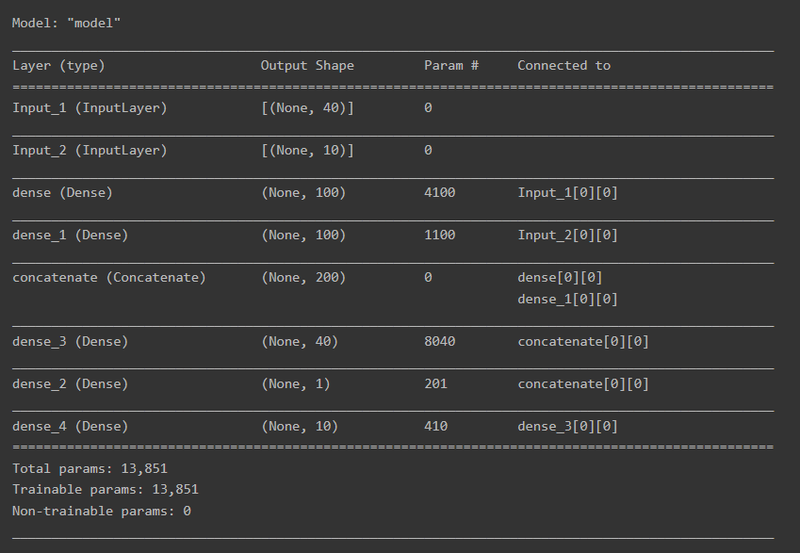 <br>
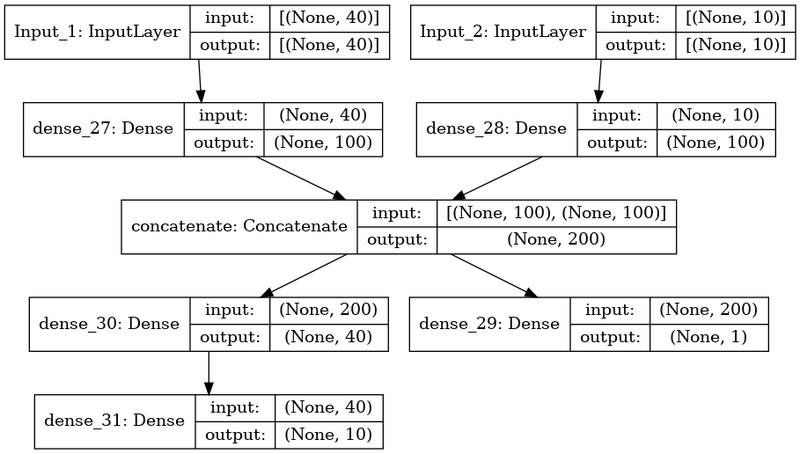 <br>